## Lab | Customer Analysis Final Round

#### For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

#### It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

### 01 - Problem (case study)

#### Data Description.
#### Goal.

### 02 - Getting Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import Normalizer

from sklearn.preprocessing import OneHotEncoder

from math import sqrt

from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Read the `.csv` file.

In [2]:
data = pd.read_csv("201009_marketing_customer_analysis.csv")

In [3]:
# Check head
data.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


### 03 - Cleaning/Wrangling/EDA

#### Change headers names.

In [4]:
# Check header names
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
# Standardize header names
data = data.rename(columns = {'EmploymentStatus':'Employment Status'})
headers = list(data.columns)
data.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [6]:
# Re-arrange headers and check head
data_ar = data[['Customer', 'State', 'Gender', 'Marital Status', 'Education', 'Employment Status', 'Income', 'Customer Lifetime Value', 'Response', 'Coverage', 'Effective To Date', 'Location Code', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size']]
data_ar.head(2)

,Customer,State,Gender,Marital Status,Education,Employment Status,Income,Customer Lifetime Value,Response,Coverage,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,F,Married,Bachelor,Employed,56274,2763.519279,No,Basic,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,F,Single,Bachelor,Unemployed,0,6979.535903,No,Extended,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [7]:
# Check shape of dataframe
data_ar.shape

(9134, 24)

In [8]:
# Drop Customer column (provides no valuable insight)
# Drop Effective to Date until I have more time to deal with date/time formatting
data_drop = data_ar.drop(columns = ['Customer', 'Effective To Date'],axis=1)
data_drop.head(2)

,State,Gender,Marital Status,Education,Employment Status,Income,Customer Lifetime Value,Response,Coverage,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,F,Married,Bachelor,Employed,56274,2763.519279,No,Basic,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,F,Single,Bachelor,Unemployed,0,6979.535903,No,Extended,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


#### Deal with NaN values.

In [9]:
# Check if there are any null values
data_drop.isnull().sum()

State                            0
Gender                           0
Marital Status                   0
Education                        0
Employment Status                0
Income                           0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Location Code                    0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [10]:
# If there were null values I could check the amount or percentage per column:
        # round(data_drop.isnull().sum()/len(data_drop), 3)*100
    
# There are no null values to drop
        # data_drop.dropna()

In [11]:
data_drop.shape

(9134, 22)

In [12]:
# Get rid of duplicates
data_drop.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,State,Gender,Marital Status,Education,Employment Status,Income,Customer Lifetime Value,Response,Coverage,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,F,Married,Bachelor,Employed,56274,2763.519279,No,Basic,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,F,Single,Bachelor,Unemployed,0,6979.535903,No,Extended,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,F,Married,Bachelor,Employed,48767,12887.431650,No,Premium,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,M,Married,Bachelor,Unemployed,0,7645.861827,No,Basic,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,M,Single,Bachelor,Employed,43836,2813.692575,No,Basic,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,F,Single,College,Employed,47761,4100.398533,No,Premium,Suburban,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9129,California,M,Married,Bachelor,Employed,71941,23405.987980,No,Basic,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9131,California,M,Single,Bachelor,Unemployed,0,8163.890428,No,Extended,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,M,Married,College,Employed,21941,7524.442436,No,Extended,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


#### Categorical Features.

In [13]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Gender                         9134 non-null   object 
 2   Marital Status                 9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   Employment Status              9134 non-null   object 
 5   Income                         9134 non-null   int64  
 6   Customer Lifetime Value        9134 non-null   float64
 7   Response                       9134 non-null   object 
 8   Coverage                       9134 non-null   object 
 9   Location Code                  9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [14]:
for col in ['State', 'Gender', 'Marital Status', 'Education', 'Employment Status', 'Response', 'Coverage', 'Location Code', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']:
    data_drop[col] = data_drop[col].astype('category')

In [15]:
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   State                          9134 non-null   category
 1   Gender                         9134 non-null   category
 2   Marital Status                 9134 non-null   category
 3   Education                      9134 non-null   category
 4   Employment Status              9134 non-null   category
 5   Income                         9134 non-null   int64   
 6   Customer Lifetime Value        9134 non-null   float64 
 7   Response                       9134 non-null   category
 8   Coverage                       9134 non-null   category
 9   Location Code                  9134 non-null   category
 10  Monthly Premium Auto           9134 non-null   int64   
 11  Months Since Last Claim        9134 non-null   int64   
 12  Months Since Policy Inception  913

In [16]:
data_cat = data_drop.select_dtypes('category')
data_cat.head(2)

,State,Gender,Marital Status,Education,Employment Status,Response,Coverage,Location Code,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,F,Married,Bachelor,Employed,No,Basic,Suburban,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,F,Single,Bachelor,Unemployed,No,Extended,Suburban,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


#### Numerical Features.

In [17]:
data_num = data_drop.select_dtypes('number')
data_num.head()

,Income,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,56274,2763.519279,69,32,5,0,1,384.811147
1,0,6979.535903,94,13,42,0,8,1131.464935
2,48767,12887.431650,108,18,38,0,2,566.472247
3,0,7645.861827,106,18,65,0,7,529.881344
4,43836,2813.692575,73,12,44,0,1,138.130879


#### Exploration.

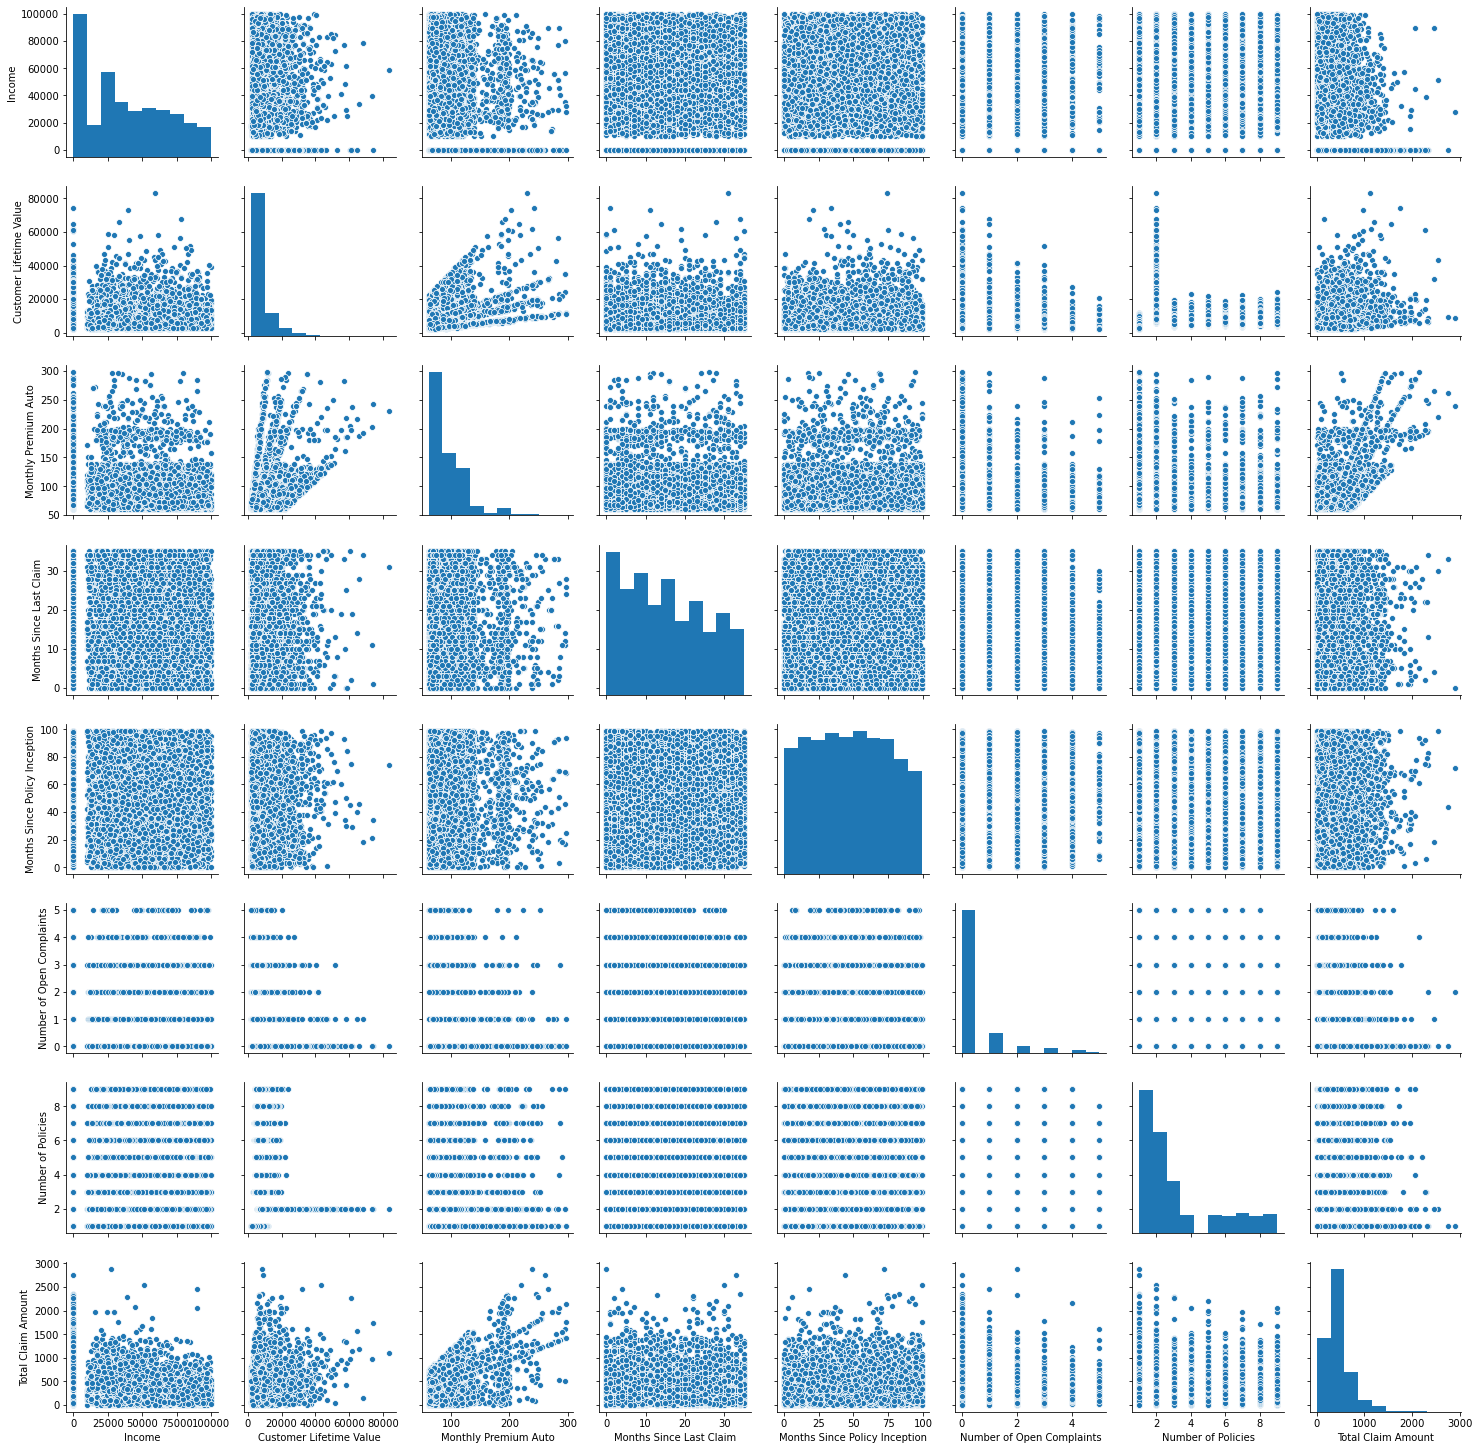

In [18]:
sns.pairplot(data_num)

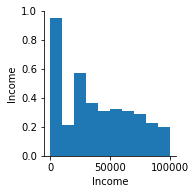

In [53]:
sns.pairplot(data_num[['Income']])

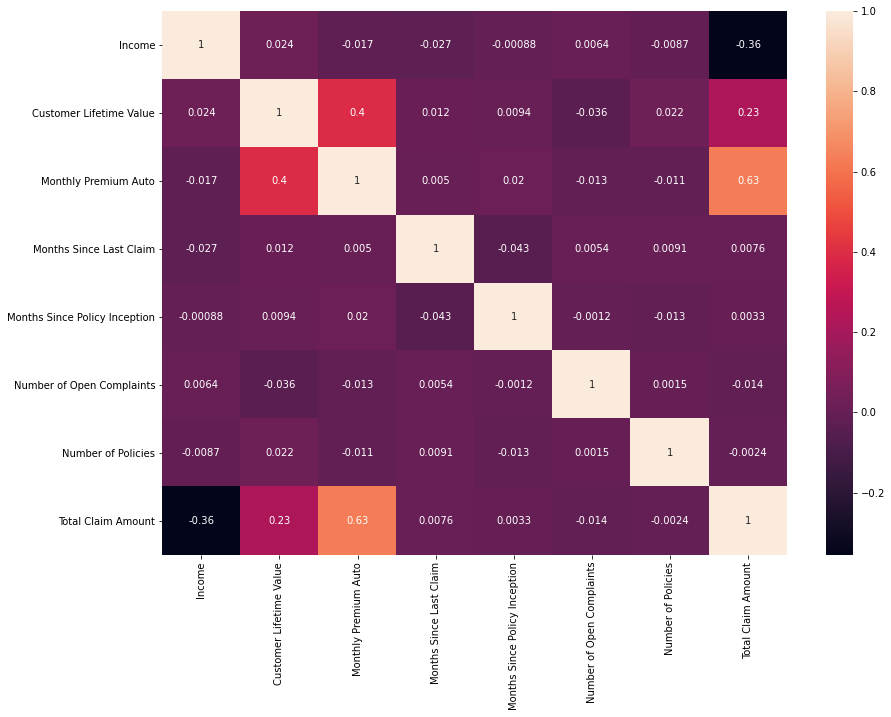

In [19]:
corr_matrix_pearson = data_num.corr(method='pearson')
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.heatmap(corr_matrix_pearson, annot=True)
plt.show()

In [20]:
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

data_vif = data_num.iloc[:,:-1]
calc_vif(data_vif)

,variables,VIF
0,Income,2.278732
1,Customer Lifetime Value,2.805772
2,Monthly Premium Auto,6.363674
3,Months Since Last Claim,2.782622
4,Months Since Policy Inception,3.265764
5,Number of Open Complaints,1.166609
6,Number of Policies,2.297052


In [21]:
#monthly premium Auto has VIF>5, indicating high multicollinearity between this independent variable and the others.
#Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features:
data_vif = data_vif.drop(['Monthly Premium Auto'],axis=1)
calc_vif(data_vif)

,variables,VIF
0,Income,2.172452
1,Customer Lifetime Value,2.110714
2,Months Since Last Claim,2.517459
3,Months Since Policy Inception,2.812209
4,Number of Open Complaints,1.158769
5,Number of Policies,2.189924


In [57]:
from scipy.stats import skew
data_vif.apply(skew)

Income                           0.286840
Customer Lifetime Value          3.031782
Months Since Last Claim          0.278541
Months Since Policy Inception    0.040158
Number of Open Complaints        2.782806
Number of Policies               1.253127
dtype: float64

### 04 - Processing Data

#### Dealing with outliers.

In [22]:
data_vif.describe()

,Income,Customer Lifetime Value,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,37657.380009,8004.940475,15.097000,48.064594,0.384388,2.966170
std,30379.904734,6870.967608,10.073257,27.905991,0.910384,2.390182
min,0.000000,1898.007675,0.000000,0.000000,0.000000,1.000000
25%,0.000000,3994.251794,6.000000,24.000000,0.000000,1.000000
50%,33889.500000,5780.182197,14.000000,48.000000,0.000000,2.000000
75%,62320.000000,8962.167041,23.000000,71.000000,0.000000,4.000000
max,99981.000000,83325.381190,35.000000,99.000000,5.000000,9.000000


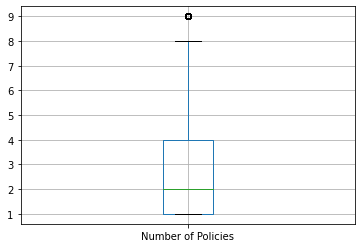

In [23]:
data_vif[["Number of Policies"]].boxplot()

In [24]:
Q1 = data_vif.quantile(0.25)
Q3 = data_vif.quantile(0.75)
IQR = Q3 - Q1

In [25]:
# Check amount of outliers in dataframe
((data_vif < (Q1 - 1.5 * IQR)) | (data_vif > (Q3 + 1.5 * IQR))).sum()

Income                              0
Customer Lifetime Value           817
Months Since Last Claim             0
Months Since Policy Inception       0
Number of Open Complaints        1882
Number of Policies                416
dtype: int64

In [26]:
data_vif.shape

(9134, 6)

In [27]:
# Marking outliers
#data_vif['Outlier'] = np.where(data_vif['Customer Lifetime Value'] < 20, 0, 1)
#data_vif

In [54]:
# Dropping outliers
#from scipy import stats
#data_vif[(np.abs(stats.zscore(data_vif)) < 3).all(axis=1)]

#### Normalization.

In [38]:
# X-y split.
y = data_vif['Income']
x = data_vif.drop('Income', axis=1)
x = x.select_dtypes('number')
len(x.columns)

5

In [39]:
# Normalize (numerical).

transformer = Normalizer().fit(data_vif)
x_normalized = transformer.transform(data_vif)
x_normalized

data_normalized = pd.DataFrame(data=x_normalized)
data_normalized.columns = data_normalized.columns.astype(str)
data_normalized.rename(columns={'0':'Income', '1':'Customer Lifetime Value', '2':'Months Since Last Claim', '3':'Months Since Policy Inception', '4':'Number of Open Complaints', '5':'Number of Policies'}, inplace=True)
data_normalized.head()

,Income,Customer Lifetime Value,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.998796,0.049049,0.000568,0.000089,0.0,0.000018
1,0.000000,0.999980,0.001863,0.006017,0.0,0.001146
2,0.966810,0.255494,0.000357,0.000753,0.0,0.000040
3,0.000000,0.999961,0.002354,0.008501,0.0,0.000915
4,0.997946,0.064055,0.000273,0.001002,0.0,0.000023


#### Encoding Categorical Data.

In [40]:
# Dummify categorical data

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(data_cat)
encoded = encoder.transform(data_cat).toarray()
display(encoded)

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [41]:
dummy_data = pd.get_dummies(data_cat, drop_first = True)
dummy_data

,State_California,State_Nevada,State_Oregon,State_Washington,Gender_M,Marital Status_Married,Marital Status_Single,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,1,0,0,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


#### Concatenate data_normalized and dummy_data

In [42]:
concat_data = pd.concat([dummy_data, data_normalized], axis=1)
concat_data.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Gender_M,Marital Status_Married,Marital Status_Single,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Income,Customer Lifetime Value,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0,0,0,1,0,1,0,0,0,0,...,0,1,1,0,0.998796,0.049049,0.000568,0.000089,0.0,0.000018
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0.000000,0.999980,0.001863,0.006017,0.0,0.001146
2,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0.966810,0.255494,0.000357,0.000753,0.0,0.000040
3,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0.000000,0.999961,0.002354,0.008501,0.0,0.000915
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0.997946,0.064055,0.000273,0.001002,0.0,0.000023


#### PEARSON CORRELATION MAP

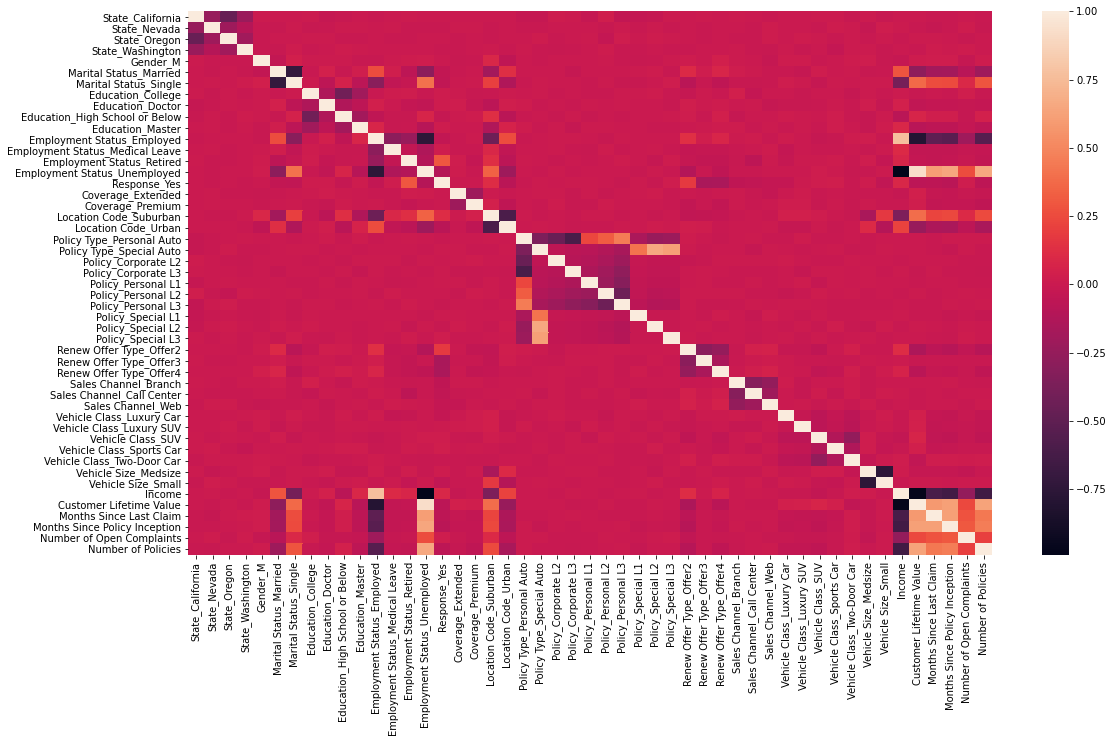

In [43]:
corr_matrix_pearson = concat_data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(18, 10))
ax = sns.heatmap(corr_matrix_pearson, annot=False)
plt.show()

In [35]:
# Should I drop highly correlated features?

#### Splitting into train set and test set.

In [45]:
type(concat_data)

pandas.core.frame.DataFrame

In [156]:
Y = concat_data[['Income']]

In [157]:
Y.head()

,Income
0,0.998796
1,0.000000
2,0.966810
3,0.000000
4,0.997946


In [158]:
X = concat_data[['Customer Lifetime Value','Months Since Last Claim','Months Since Policy Inception','Number of Open Complaints','Number of Policies']]

In [159]:
X.head()

,Customer Lifetime Value,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.049049,0.000568,0.000089,0.0,0.000018
1,0.999980,0.001863,0.006017,0.0,0.001146
2,0.255494,0.000357,0.000753,0.0,0.000040
3,0.999961,0.002354,0.008501,0.0,0.000915
4,0.064055,0.000273,0.001002,0.0,0.000023


In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.3, random_state = 100)

In [162]:
X_train.head()

,Customer Lifetime Value,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
8720,0.339981,0.002309,0.001117,0.000298,0.000223
6092,0.552685,0.000107,0.000997,0.000000,0.000071
1412,0.082392,0.000114,0.000669,0.000033,0.000147
4717,0.070642,0.000468,0.000661,0.000000,0.000014
3725,0.999997,0.001873,0.001227,0.000194,0.000129


### 05 - Modeling

#### Apply model.

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
model = LinearRegression()

In [165]:
lm = model.fit(X_train, Y_train)

In [166]:
predictions = lm.predict(X_test)

In [167]:
predictions

array([[1.04288989],
       [0.91883925],
       [0.95716709],
       ...,
       [0.98220961],
       [0.38740298],
       [1.07403512]])

In [168]:
residuals = predictions - Y_test

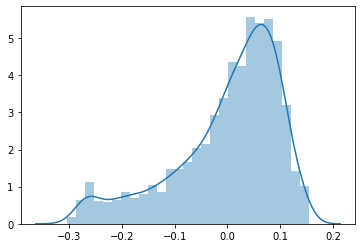

In [169]:
sns.distplot(residuals)

### 06 - Model Validation

#### R2.

In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_error

In [171]:
R2 = r2_score(Y_test, predictions)
print("R2 of the linear model on test set: %5.3f" % (R2))

R2 of the linear model on test set: 0.944


#### MSE.

In [172]:
MSE = mean_squared_error(Y_test, predictions)
print("MSE of the linear model on test set: %5.3f" % (MSE))

MSE of the linear model on test set: 0.010


#### RMSE.

In [173]:
RMSE = sqrt(mean_squared_error(Y_test, predictions))
print("RMSE of the linear model on test set: %5.3f" % (RMSE))

RMSE of the linear model on test set: 0.100


#### MAE.

In [174]:
MAE = mean_absolute_error(Y_test, predictions)
print("MAE of the linear model on test set: %5.3f" % (MAE))

MAE of the linear model on test set: 0.079


### 07 - Reporting

#### Present results.